In [52]:
import os

In [53]:
base_dir = 'C:/Users/S. M. Towhid Hasan/Downloads/finalDataset1'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [54]:
label = []
texts = []

for label_type in ['0', '1','2','3','4','5','6', '7','8','9','10']:
    train_dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(train_dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(train_dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == '0':
                label.append(0)
            if label_type == '1':
                label.append(1)
            if label_type == '2':
                label.append(2)
            if label_type == '3':
                label.append(3)
            if label_type == '4':
                label.append(4)
            if label_type == '5':
                label.append(5)
            if label_type == '6':
                label.append(6)
            if label_type == '7':
                label.append(7)
            if label_type == '8':
                label.append(8)
            if label_type == '9':
                label.append(9)
            if label_type == '10':
                label.append(10)

In [55]:
len(label)

215

In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 300  # We will cut reviews after 300 words
training_samples = 180  # We will be training on 50 samples
validation_samples = 35  # We will be validating on 12 samples
max_words = 900  # We will only consider the top 800 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 777 unique tokens.


In [57]:
data = pad_sequences(sequences, maxlen=maxlen)

In [58]:
data

array([[  0,   0,   0, ...,   0,   0,   9],
       [  0,   0,   0, ...,   0,   0, 659],
       [  0,   0,   0, ...,   0,   0, 660],
       ...,
       [  0,   0,   0, ...,  82,  18, 192],
       [  0,   0,   0, ...,  82,  18, 192],
       [  0,   0,   0, ...,  82,  18, 192]])

In [59]:
label = np.asarray(label)

In [60]:
from keras.utils import to_categorical
labels = to_categorical(label)

In [61]:
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [62]:
indices = np.arange(data.shape[0])

In [63]:
len(indices)

215

In [64]:
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [65]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (215, 300)
Shape of label tensor: (215, 11)


In [66]:
labels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [67]:
glove_dir = 'C:/Users/S. M. Towhid Hasan/Downloads/glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [68]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [69]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          90000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1920064   
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 11)                363       
Total params: 2,012,507
Trainable params: 2,012,507
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_data=(x_val, y_val))

Train on 180 samples, validate on 35 samples
Epoch 1/20
180/180 [==============================] - 3s 14ms/step - loss: 2.3088 - acc: 0.5611 - val_loss: 1.2552 - val_acc: 0.7429
Epoch 2/20
180/180 [==============================] - 2s 11ms/step - loss: 0.9667 - acc: 0.8111 - val_loss: 0.8146 - val_acc: 0.8571
Epoch 3/20
180/180 [==============================] - 2s 11ms/step - loss: 0.5836 - acc: 0.8667 - val_loss: 1.1106 - val_acc: 0.7429
Epoch 4/20
180/180 [==============================] - 2s 11ms/step - loss: 0.4674 - acc: 0.9111 - val_loss: 1.6112 - val_acc: 0.7429
Epoch 5/20
180/180 [==============================] - 2s 11ms/step - loss: 0.8364 - acc: 0.8778 - val_loss: 1.3251 - val_acc: 0.8857
Epoch 6/20
180/180 [==============================] - 2s 11ms/step - loss: 0.5664 - acc: 0.9278 - val_loss: 0.8252 - val_acc: 0.8571
Epoch 7/20
180/180 [==============================] - 2s 11ms/step - loss: 0.4059 - acc: 0.9333 - val_loss: 0.8990 - val_acc: 0.8571
Epoch 8/20
180/180 [====

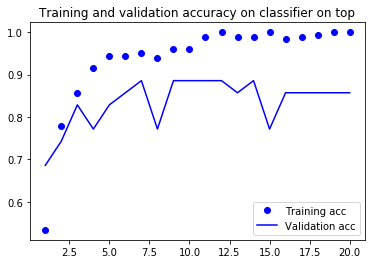

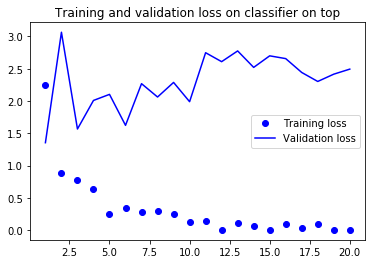

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy on classifier on top')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss on classifier on top')
plt.legend()

plt.show()

In [23]:
tlabel = []
ttexts = []

for label_type in ['0', '1','2','3','4','5','6', '7','8','9','10']:
    test_dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(test_dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(test_dir_name, fname))
            ttexts.append(f.read())
            f.close()
            if label_type == '0':
                tlabel.append(0)
            if label_type == '1':
                tlabel.append(1)
            if label_type == '2':
                tlabel.append(2)
            if label_type == '3':
                tlabel.append(3)
            if label_type == '4':
                tlabel.append(4)
            if label_type == '5':
                tlabel.append(5)
            if label_type == '6':
                tlabel.append(6)
            if label_type == '7':
                tlabel.append(7)
            if label_type == '8':
                tlabel.append(8)
            if label_type == '9':
                tlabel.append(9)
            if label_type == '10':
                tlabel.append(10)

In [24]:
sequences = tokenizer.texts_to_sequences(ttexts)
x_test = pad_sequences(sequences, maxlen=maxlen)
t_label = np.asarray(tlabel)
y_test = to_categorical(t_label)

In [51]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy on classifier on top:", score[1])

155/155 [==============================] - 0s 3ms/step
Test Accuracy on classifier on top: 0.9096774458885193


In [26]:
from keras.layers import SimpleRNN

In [27]:
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.layers import Embedding, SimpleRNN



In [28]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(SimpleRNN(32))
model.add(Dense(11, activation='softmax'))

In [29]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [30]:


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=2,
                    validation_split=0.2)

Train on 144 samples, validate on 36 samples
Epoch 1/20
144/144 [==============================] - 9s 60ms/step - loss: 2.0044 - acc: 0.3889 - val_loss: 1.4969 - val_acc: 0.5833
Epoch 2/20
144/144 [==============================] - 8s 58ms/step - loss: 1.3288 - acc: 0.5903 - val_loss: 1.2353 - val_acc: 0.5833
Epoch 3/20
144/144 [==============================] - 8s 57ms/step - loss: 1.1075 - acc: 0.6528 - val_loss: 1.0800 - val_acc: 0.6389
Epoch 4/20
144/144 [==============================] - 8s 56ms/step - loss: 0.9561 - acc: 0.7014 - val_loss: 1.0145 - val_acc: 0.5278
Epoch 5/20
144/144 [==============================] - 8s 56ms/step - loss: 0.8624 - acc: 0.7292 - val_loss: 0.9222 - val_acc: 0.6667
Epoch 6/20
144/144 [==============================] - 8s 57ms/step - loss: 0.7901 - acc: 0.7361 - val_loss: 0.8844 - val_acc: 0.6667
Epoch 7/20
144/144 [==============================] - 8s 55ms/step - loss: 0.7299 - acc: 0.7431 - val_loss: 0.8105 - val_acc: 0.7500
Epoch 8/20
144/144 [====

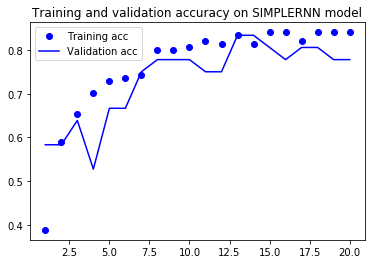

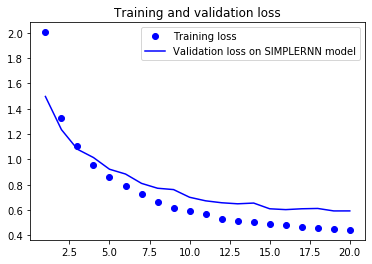

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy on SIMPLERNN model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss on SIMPLERNN model')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy on on SIMPLERNN model:", score[1])

155/155 [==============================] - 0s 1ms/step
Test Accuracy on on SIMPLERNN model: 0.8645161390304565


In [33]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(64))
model.add(Dense(11, activation='softmax'))



In [34]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [47]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=10,
                    validation_split=0.2)

Train on 144 samples, validate on 36 samples
Epoch 1/20
144/144 [==============================] - 12s 82ms/step - loss: 0.3490 - acc: 0.8750 - val_loss: 0.4591 - val_acc: 0.7778
Epoch 2/20
144/144 [==============================] - 9s 66ms/step - loss: 0.2812 - acc: 0.9097 - val_loss: 0.4491 - val_acc: 0.7778
Epoch 3/20
144/144 [==============================] - 9s 66ms/step - loss: 0.2613 - acc: 0.9097 - val_loss: 0.4066 - val_acc: 0.8056
Epoch 4/20
144/144 [==============================] - 10s 66ms/step - loss: 0.3496 - acc: 0.8889 - val_loss: 0.5190 - val_acc: 0.7778
Epoch 5/20
144/144 [==============================] - 9s 66ms/step - loss: 0.3812 - acc: 0.8681 - val_loss: 0.4681 - val_acc: 0.8056
Epoch 6/20
144/144 [==============================] - 10s 67ms/step - loss: 0.3004 - acc: 0.9097 - val_loss: 0.4331 - val_acc: 0.8333
Epoch 7/20
144/144 [==============================] - 9s 66ms/step - loss: 0.2581 - acc: 0.9167 - val_loss: 0.4044 - val_acc: 0.8333
Epoch 8/20
144/144 [=

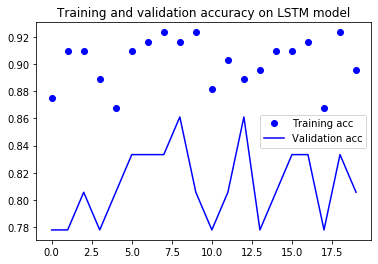

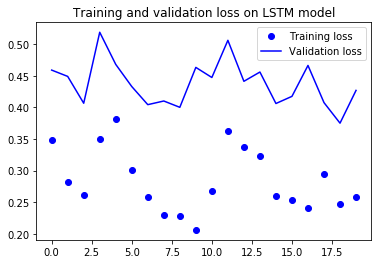

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy on LSTM model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss on LSTM model')
plt.legend()

plt.show()

In [50]:
score = model.evaluate(x_test, y_test, verbose=1)


print("Test Accuracy on LSTM:", score[1])

155/155 [==============================] - 0s 3ms/step
Test Accuracy on LSTM: 0.9096774458885193
